<a href="https://colab.research.google.com/github/ayushi240825/Task/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task - 2 : Perform data cleaning and exploratory data analysis (EDA) on a dataset. Explore the relationships between variables and identify patterns and trends in the data.

In [ ]:
import pandas as pd

df = pd.read_csv('train.csv')  # replace with actual path
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.isnull().sum()

# Fill missing Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin (too many missing)
df.drop('Cabin', axis=1, inplace=True)


In [ ]:
df.describe()
df['Survived'].value_counts()


,count
Survived,
0,549
1,342


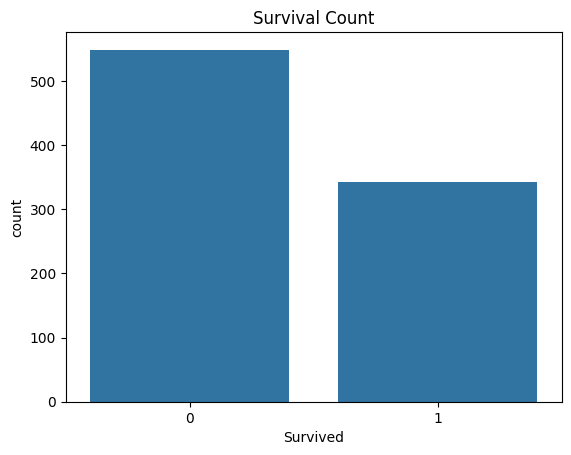

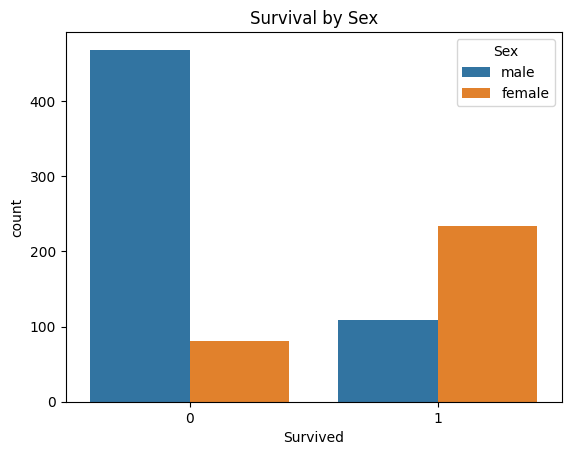

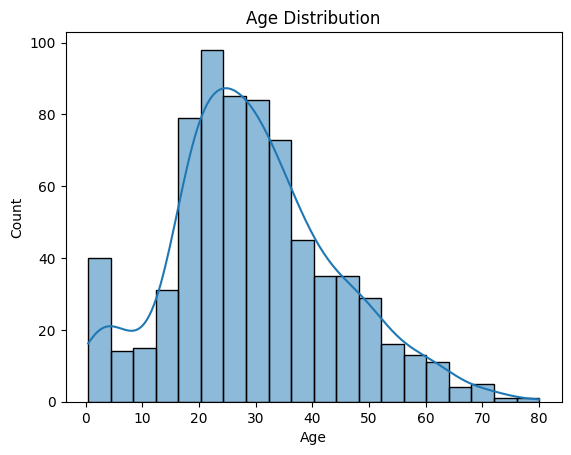

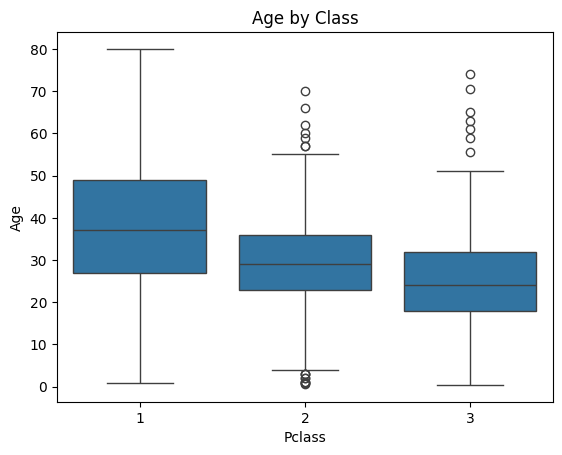

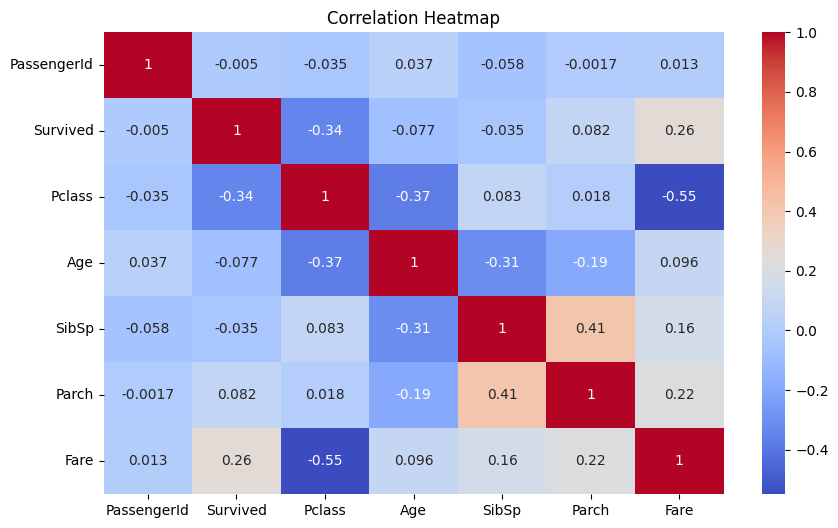

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Survival count
sns.countplot(data=df, x='Survived')
plt.title('Survival Count')
plt.show()

# Survival by Sex
sns.countplot(data=df, x='Survived', hue='Sex')
plt.title('Survival by Sex')
plt.show()

# Age Distribution
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

# Boxplot of Age vs Pclass
sns.boxplot(data=df, x='Pclass', y='Age')
plt.title('Age by Class')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.drop('Name', axis=1).corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()